In [96]:
# ch1-2. 
import pandas as pd

CCTV_Seoul = pd.read_csv("./서울시 자치구 년도별 CCTV 설치 현황.csv", encoding="utf-8")
CCTV_Seoul.head()

CCTV_Seoul.columns
# CCTV_Seoul.columns[0]

CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)
CCTV_Seoul.head()

# pop_Seoul = pd.read_excel("./서울인구_구별.xls", encoding="utf-8")
pop_Seoul = pd.read_excel("./서울인구_구별.xls",
                         header = 2, # 몇번째 row부터 읽을 것인지 지정 
                         parse_cols="B,D,G,J,M,N", # 읽기 원하는 컬럼을 지정 
                         encoding="utf-8")
pop_Seoul.rename(columns={pop_Seoul.columns[0]:'구별',
                          pop_Seoul.columns[1]:'인구수',
                          pop_Seoul.columns[2]:'한국인',
                          pop_Seoul.columns[3]:'외국인',
                          pop_Seoul.columns[4]:'세대당인구',
                          pop_Seoul.columns[5]:'고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,세대당인구,고령자
0,합계,10089517,9814049,275468,2.31,1393671
1,종로구,163569,153780,9789,2.09,26512
2,중구,135427,126032,9395,2.06,21798
3,용산구,245245,229677,15568,2.12,37331
4,성동구,316068,308066,8002,2.27,42171


In [63]:
# ch1-3.
import pandas as pd
import numpy as np

s = pd.Series([1,3,4,np.NaN,6,8])
# print(s)

dates = pd.date_range('20180920', periods=6) # 주어진 날짜부터 시작함. periods값은 실제 0..(periods-1) 임
# print(dates)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df
df.head(3)
df.index # DataFrame의 인덱스로 사용 되는 값을 배열로 반환 
df.columns # DataFrame의 컬럼 지시 값을 배열로 반환 
df.values # DataFrame의 값들을 배열로 반환 
df.info() # DataFrame의 개요
df.describe() # DataFrame의 통계적 개요 확인 
df.sort_values(by='B', ascending=False) # by에 주어진 컬럼을 기준으로 정렬. ascending 값으로 오름차순/내림차순 설정
df['A'] # 컬럼으로 해당 데이터들을 읽는다.
df[0:3] # row0 ~ row3 까지 데이터를 읽는다.
df['2018-09-22':'2018-09-24'] # row의 인덱스명으로 데이터를 읽는다. 

df.loc[:,['A','B']] # DataFrame에 location 지정 방법으로 데이터를 읽는다.
df.loc['2018-09-22':'2018-09-24',['A','B']] # '2018-09-22'~'2018-09-24' 데이터 중 컬럼 'A','B' 값들을 읽는다.
df.loc['2018-09-22':'2018-09-24','B':'D'] # '2018-09-22'~'2018-09-24' 데이터 중 컬럼 'B'~'D' 값들을 읽는다.
df.loc['2018-09-22':'2018-09-25','A'] # '2018-09-22'~'2018-09-24' 데이터 중 컬럼 'A' 값들을 읽는다.
df.iloc[3] # 행이나 열의 범위를 숫자로 지정할 때 사용. 4번째 행(0부터 시작)
df.iloc[:,3] # 4번째 컬럼 
df.iloc[1:3,2:3] # 2행 ~ 3행, 3컬럼
print(df)
df.iloc[[1,2,3], [2,3]] # 2행,3행,4행의 2컬럼,3컬럼 데이터

# 조건절을 사용하여 데이터 읽기
df[df.A > 0] # 'A'컬럼 데이터가 0보다 큰 경우의 값들 
df[df>0] # 데이터 전체에 대해 조건을 걸 수도 있다. 0보다 큰 경우의 값들. 해당 없으면 NaN

# DataFrame 복사 
df_copy = df # reference copy
df_deep_copy = df.copy() # value copy
df_deep_copy['E'] = ['1','1','2','3','4','3']
print(df_deep_copy)
print(df)
print(df_copy)

# 값 존재 유무 판단
df_deep_copy['E'].isin(['2','4'])
# isin을 사용하여 데이터 선별하기
df_deep_copy[df_deep_copy['E'].isin(['2','4'])]

# 통계적 데이터를 보고자 할 때
df.apply(np.cumsum) # 각 컬럼의 누적합을 보여준다

df.apply(lambda x: x.max() - x.min()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2018-09-20 to 2018-09-25
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes
                   A         B         C         D
2018-09-20  1.323498 -0.612084  1.419793  0.630429
2018-09-21 -0.043425  0.008643  0.361444  0.808701
2018-09-22 -0.099394 -0.393728 -0.080440  1.527035
2018-09-23 -1.239806  0.167922 -0.576191 -0.454442
2018-09-24  0.252271  1.162024  1.352809  0.383051
2018-09-25  0.085261 -0.726786 -0.309862 -0.772606
                   A         B         C         D  E
2018-09-20  1.323498 -0.612084  1.419793  0.630429  1
2018-09-21 -0.043425  0.008643  0.361444  0.808701  1
2018-09-22 -0.099394 -0.393728 -0.080440  1.527035  2
2018-09-23 -1.239806  0.167922 -0.576191 -0.454442  3
2018-09-24  0.252271  1.162024  1.352809  0.383051  4
2018-09-25  0.085261 -0.726786 -0.309862 -0.77260

A    2.563303
B    1.888810
C    1.995983
D    2.299641
dtype: float64

In [98]:
# ch1-4.
# import pandas as pd

# CCTV_Seoul = pd.read_csv("./서울시 자치구 년도별 CCTV 설치 현황.csv", encoding="utf-8")
# CCTV_Seoul.head()
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

# 3년간 CCTV 수 합계 계산 하여 '3년간소계' 컬럼으로 저장
sum_cctv = CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년']
sum_cctv
CCTV_Seoul['3년간소계'] = sum_cctv
CCTV_Seoul
# '3년간소계' / '2013년도 이전'컬럼으로 나누어 '최근증가율' 컬럼으로 저장 
# growth_rate = sum_cctv / CCTV_Seoul['2013년도 이전']  # 또는 컬럼 대상으로 직접 계산 
growth_rate = CCTV_Seoul['3년간소계'] / CCTV_Seoul['2013년도 이전']
growth_rate
CCTV_Seoul['최근증가율'] = growth_rate *100
CCTV_Seoul

# 위의 과정을 한줄로 처리. '3년간소계' 컬럼은 생략 
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년']) \
                        / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False) # 내림차순 정렬 


# 서울 인구 
# pop_Seoul = pd.read_excel("./서울인구_구별.xls",
#                          header = 2, # 몇번째 row부터 읽을 것인지 지정 
#                          parse_cols="B,D,G,J,M,N", # 읽기 원하는 컬럼을 지정 
#                          encoding="utf-8")
# pop_Seoul.rename(columns={pop_Seoul.columns[0]:'구별',
#                           pop_Seoul.columns[1]:'인구수',
#                           pop_Seoul.columns[2]:'한국인',
#                           pop_Seoul.columns[3]:'외국인',
#                           pop_Seoul.columns[4]:'세대당인구',
#                           pop_Seoul.columns[5]:'고령자'}, inplace=True)
pop_Seoul.head()
# 0번째 행 삭제 
pop_Seoul.drop([0], inplace=True)
pop_Seoul
# '구별' 컬럼이 unique 값 확인 
pop_Seoul['구별'].unique()

# '구별' 컬럼이 null 인지 판별 
pop_Seoul['구별'].isnull()
# '구별' 컬럼이 null 인 데이터 추출 
pop_Seoul[pop_Seoul['구별'].isnull()]

# 구별 전체 인구를 이용하여 '외국인비율'과 '고령자비율'을 계산
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

# 인구수로 정렬 
pop_Seoul.sort_values(by='인구수', ascending=False)

# 외국인수로 정렬
pop_Seoul.sort_values(by='외국인', ascending=False)

,구별,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,2.18,54994,8.775751,13.595516
18,금천구,252752,233263,19489,2.19,34945,7.710720,13.825806
17,구로구,440305,407235,33070,2.37,60564,7.510703,13.755011
2,중구,135427,126032,9395,2.06,21798,6.937317,16.095756
3,용산구,245245,229677,15568,2.12,37331,6.347938,15.221921
1,종로구,163569,153780,9789,2.09,26512,5.984630,16.208450
6,동대문구,364527,348903,15624,2.17,56675,4.286102,15.547545
5,광진구,370519,355748,14771,2.21,44806,3.986570,12.092767
13,서대문구,323261,311280,11981,2.26,49935,3.706293,15.447270
21,관악구,521960,504048,17912,1.94,71317,3.431681,13.663308


In [93]:
# 외국인비율로 정렬
pop_Seoul.sort_values(by='외국인비율', ascending=False)

,구별,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,2.18,54994,8.775751,13.595516
18,금천구,252752,233263,19489,2.19,34945,7.710720,13.825806
17,구로구,440305,407235,33070,2.37,60564,7.510703,13.755011
2,중구,135427,126032,9395,2.06,21798,6.937317,16.095756
3,용산구,245245,229677,15568,2.12,37331,6.347938,15.221921
1,종로구,163569,153780,9789,2.09,26512,5.984630,16.208450
6,동대문구,364527,348903,15624,2.17,56675,4.286102,15.547545
5,광진구,370519,355748,14771,2.21,44806,3.986570,12.092767
13,서대문구,323261,311280,11981,2.26,49935,3.706293,15.447270
21,관악구,521960,504048,17912,1.94,71317,3.431681,13.663308


In [99]:
pop_Seoul.sort_values(by='고령자', ascending=False)

,구별,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
24,송파구,673161,666439,6722,2.48,79093,0.998572,11.749492
16,강서구,606981,600257,6724,2.34,78042,1.107778,12.857404
12,은평구,489045,484642,4403,2.38,76097,0.900326,15.560327
11,노원구,553177,549365,3812,2.52,75741,0.689110,13.692001
21,관악구,521960,504048,17912,1.94,71317,3.431681,13.663308
8,성북구,451829,440272,11557,2.36,67132,2.557826,14.857833
23,강남구,551888,546952,4936,2.39,66011,0.894384,11.960941
7,중랑구,410296,405551,4745,2.26,60618,1.156482,14.774212
17,구로구,440305,407235,33070,2.37,60564,7.510703,13.755011
20,동작구,407275,394788,12487,2.26,58133,3.065987,14.273648


In [101]:
pop_Seoul.sort_values(by='고령자비율', ascending=False)

,구별,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
9,강북구,326063,322385,3678,2.25,57401,1.128003,17.604267
1,종로구,163569,153780,9789,2.09,26512,5.984630,16.208450
2,중구,135427,126032,9395,2.06,21798,6.937317,16.095756
10,도봉구,344096,341928,2168,2.49,54969,0.630057,15.974902
12,은평구,489045,484642,4403,2.38,76097,0.900326,15.560327
6,동대문구,364527,348903,15624,2.17,56675,4.286102,15.547545
13,서대문구,323261,311280,11981,2.26,49935,3.706293,15.447270
3,용산구,245245,229677,15568,2.12,37331,6.347938,15.221921
8,성북구,451829,440272,11557,2.36,67132,2.557826,14.857833
7,중랑구,410296,405551,4745,2.26,60618,1.156482,14.774212


In [102]:
# ch1-5.
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                    'B':['B0', 'B1', 'B2', 'B3'],
                    'C':['C0', 'C1', 'C2', 'C3'],
                    'D':['D0', 'D1', 'D2', 'D3']},
                   index=[0,1,2,3])
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6', 'A7'],
                    'B':['B4', 'B5', 'B6', 'B7'],
                    'C':['C4', 'C5', 'C6', 'C7'],
                    'D':['D4', 'D5', 'D6', 'D7']},
                   index=[4,5,6,7])
df3 = pd.DataFrame({'A':['A8', 'A9', 'A10', 'A11'],
                    'B':['B8', 'B9', 'B10', 'B11'],
                    'C':['C8', 'C9', 'C10', 'C11'],
                    'D':['D8', 'D9', 'D10', 'D11']},
                   index=[8,9,10,11])

In [103]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [104]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [105]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [107]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [108]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [109]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [112]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [113]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [114]:
# index 기준으로 두 DataFrame을 합침. 이때 해당 index에 값이 존재 하지 않으면 NaN으로 저장 됨 
# df4는 index=[0,1] 에 해당하는 값이 없음
# df1은 index=[6,7] 에 해당하는 값이 없음
df4 = pd.DataFrame({'B':['B2', 'B3', 'B6', 'B7'],
                    'D':['D2', 'D3', 'D6', 'D7'],
                    'F':['F2', 'F3', 'F6', 'F7']},
                   index=[2,3,6,7])
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [115]:
# 공통된 index의 값만 합치기 위해 사용하는 옵션 : join='inner'
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [116]:
# join_axes=[]
# df1.index기준으로 합치고 df4.index의 값 중에서 df1.index에 없는 것은 버린다.
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [117]:
# 위 예제에서 df4.index 기준으로 했을 경우 
result = pd.concat([df1, df4], axis=1, join_axes=[df4.index])
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [118]:
# ignore_index=True : 인덱스 무시 컬럼 방향으로 합침
# df1 뒤에 df4가 합쳐짐 
# 'B', 'D'는 df1, df4가 연결됨
# 'A', 'C'는 df4에 해당 값 : NaN
# 'F'는 df1에 해당 값 : NaN
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [119]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [120]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [121]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [122]:
# 컬럼 'key' 기준으로 merge 하면 'key'의 공통된 값에 대해서만 merge가 됨 
# Left inner join
pd.merge(left, right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [123]:
# left 기준으로 right 합치기 
pd.merge(left, right, how='left', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [124]:
# right 기준으로 left 합치기 
pd.merge(left, right, how='right', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [128]:
# outer join
pd.merge(left, right, how="outer", on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [126]:
# inner join
pd.merge(left, right, how="inner", on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [129]:
# ch1-6.
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,3년간소계,최근증가율,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,1946,150.619195,551888,546952,4936,2.39,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,631,166.490765,437050,432749,4301,2.44,57680,0.984098,13.197575
2,강북구,831,369,120,138,204,462,125.203252,326063,322385,3678,2.25,57401,1.128003,17.604267
3,강서구,911,388,258,184,81,523,134.793814,606981,600257,6724,2.34,78042,1.107778,12.857404
4,관악구,2109,846,260,390,613,1263,149.290780,521960,504048,17912,1.94,71317,3.431681,13.663308


In [130]:
# 행 삭제는 drop, 열 삭제는 del
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,3년간소계,최근증가율,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
0,강남구,3238,1946,150.619195,551888,546952,4936,2.39,66011,0.894384,11.960941
1,강동구,1010,631,166.490765,437050,432749,4301,2.44,57680,0.984098,13.197575
2,강북구,831,462,125.203252,326063,322385,3678,2.25,57401,1.128003,17.604267
3,강서구,911,523,134.793814,606981,600257,6724,2.34,78042,1.107778,12.857404
4,관악구,2109,1263,149.290780,521960,504048,17912,1.94,71317,3.431681,13.663308


In [131]:
# index 지정. '구별' 컬럼을 인덱스로 지정. 기존 숫자 인덱스(0,1,..)는 삭제 됨 
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,3년간소계,최근증가율,인구수,한국인,외국인,세대당인구,고령자,외국인비율,고령자비율
구별,,,,,,,,,,
강남구,3238,1946,150.619195,551888,546952,4936,2.39,66011,0.894384,11.960941
강동구,1010,631,166.490765,437050,432749,4301,2.44,57680,0.984098,13.197575
강북구,831,462,125.203252,326063,322385,3678,2.25,57401,1.128003,17.604267
강서구,911,523,134.793814,606981,600257,6724,2.34,78042,1.107778,12.857404
관악구,2109,1263,149.290780,521960,504048,17912,1.94,71317,3.431681,13.663308


In [132]:
# 상관계수 조사
# numpy.corrcoef
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.26836087],
       [-0.26836087,  1.        ]])

In [133]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04749504],
       [-0.04749504,  1.        ]])

In [134]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

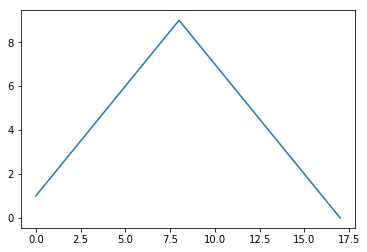

In [135]:
# ch1-7.
# 시각화 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

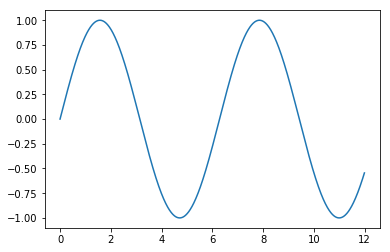

In [138]:
t = np.arange(0,12,0.01)
y = np.sin(t)
plt.figure
plt.plot(t,y)
plt.show()

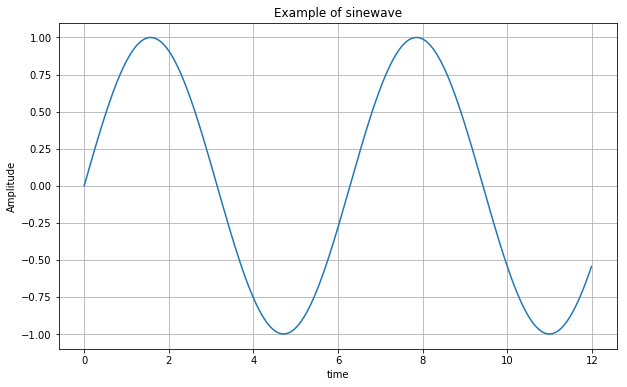

In [139]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

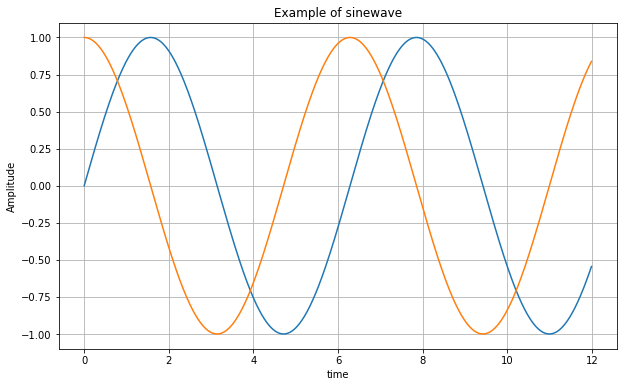

In [140]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

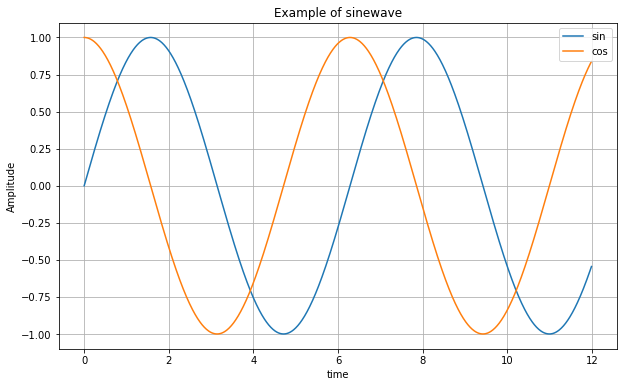

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend() # 범례 
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

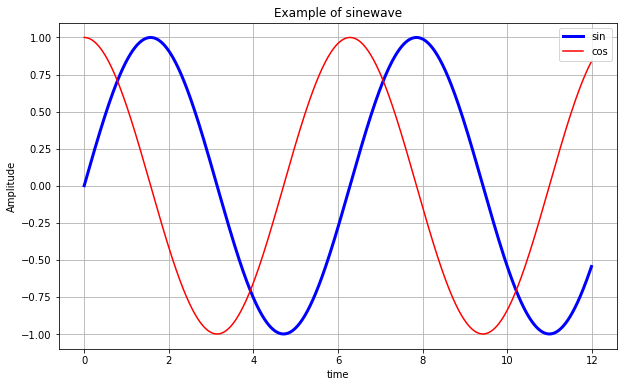

In [147]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), color='blue',lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

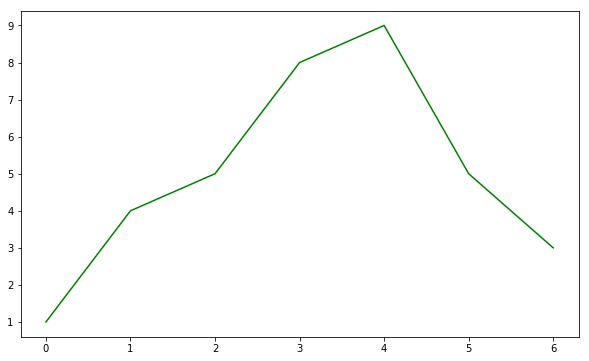

In [148]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

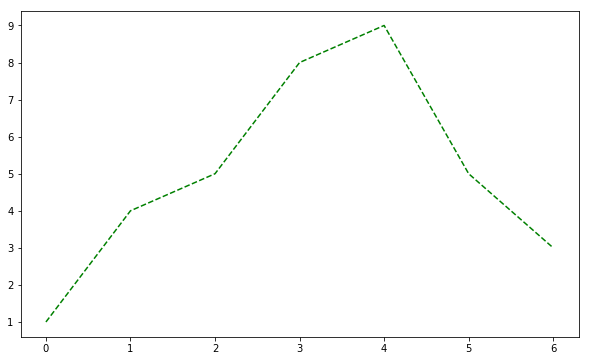

In [149]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

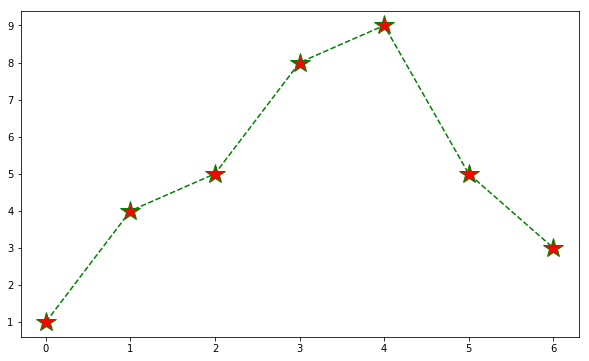

In [155]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='*', markersize=20, markerfacecolor='red')
plt.show()


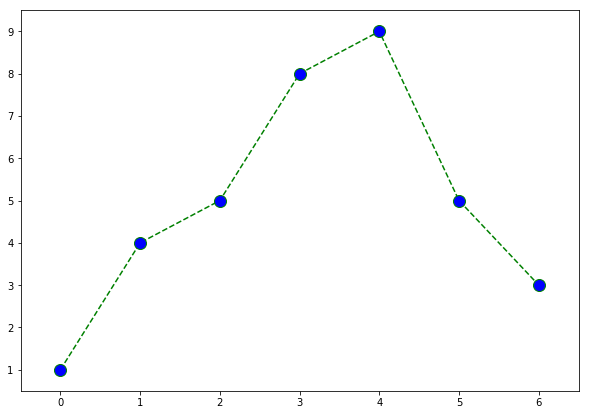

In [157]:
plt.figure(figsize=(10,7))
plt.plot(t, y, color="green", linestyle="dashed", marker='o', markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

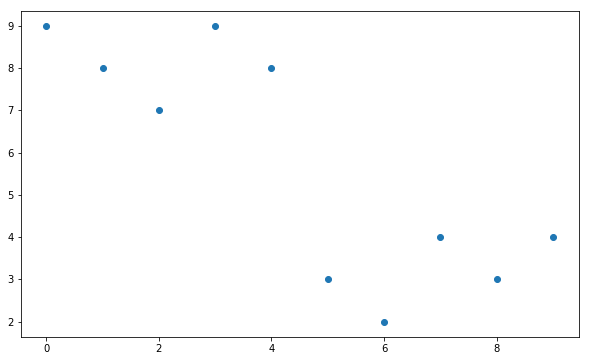

In [158]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

plt.figure(figsize=(10, 6))
plt.scatter(t, y)
plt.show()

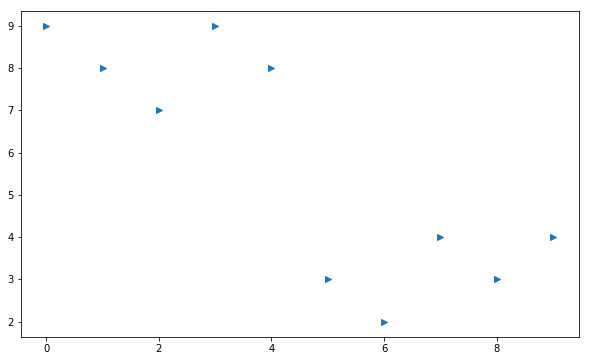

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y, marker='>')
plt.show()

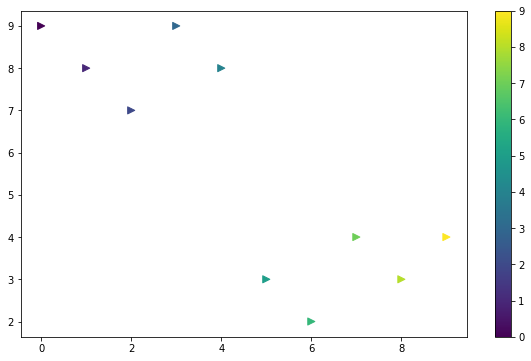

In [160]:
colormap = t

plt.figure(figsize=(10, 6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

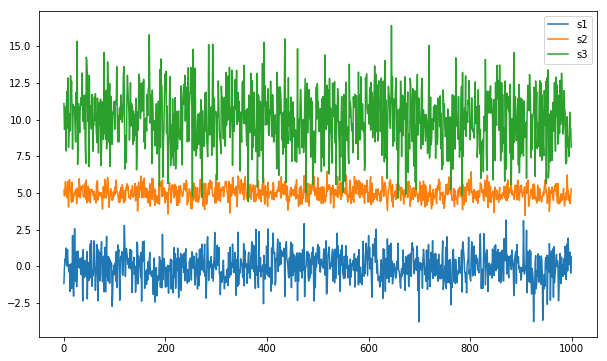

In [161]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

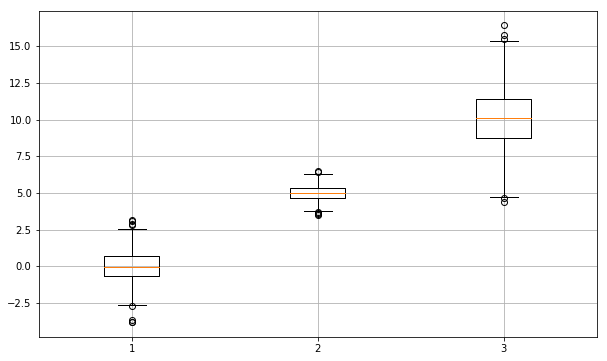

In [163]:
plt.figure(figsize=(10, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

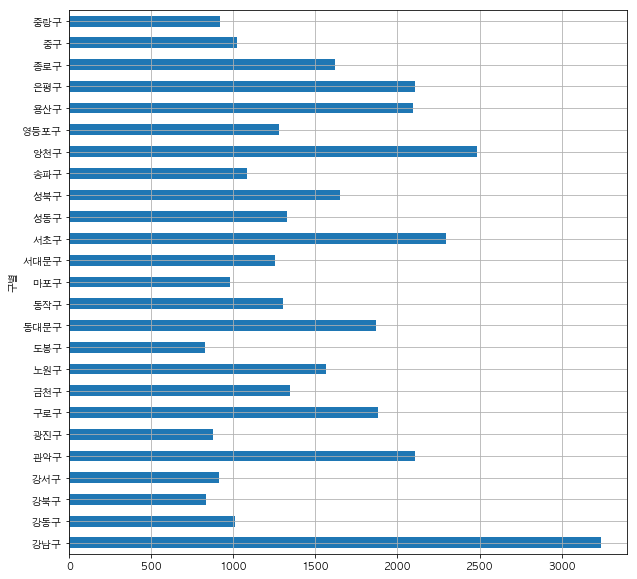

In [168]:
# ch1-8.
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown system.... ")

data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

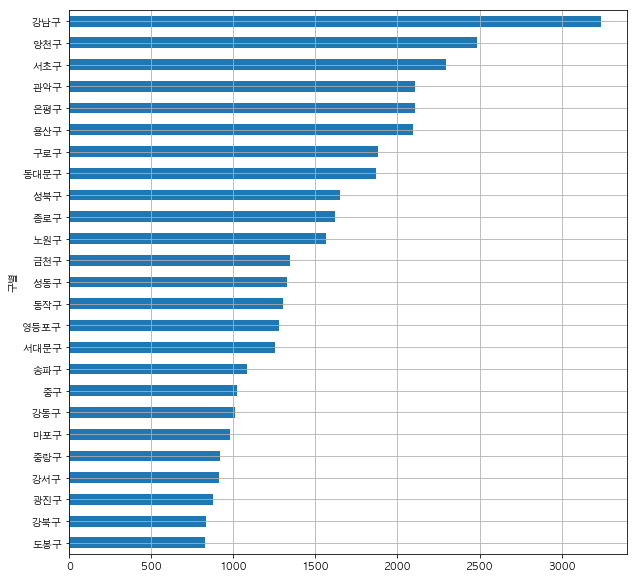

In [169]:
# CCTV 수 통계 그래프 
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

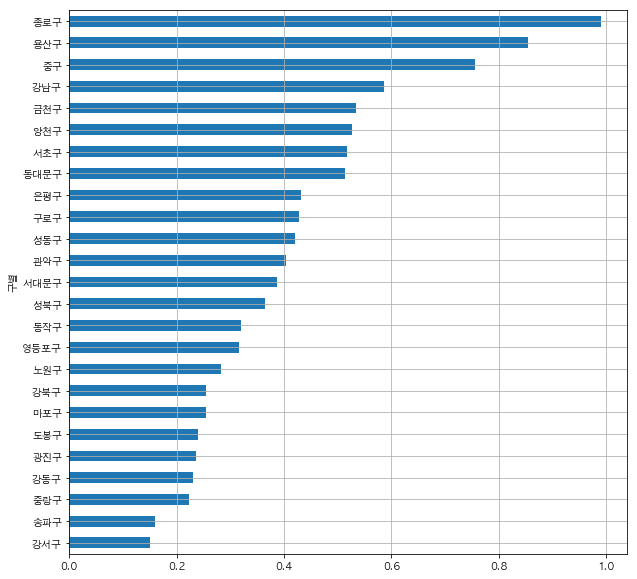

In [170]:
# 인구대비 CCTV비율 계산한 통계 그래프 
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

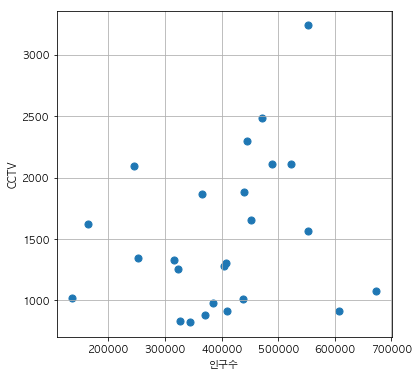

In [171]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()